## Introduction to Supervised Learning: Model

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context = 'notebook', style = 'whitegrid', palette = 'deep', font = 'sans-serif', font_scale = 1, rc = None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


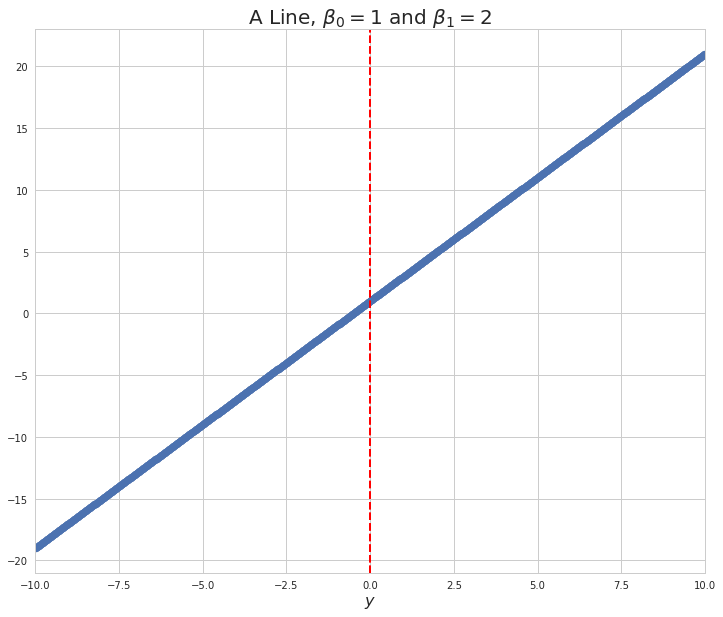

In [3]:
x = linspace(-10, 10, 1000)
y = 1 + 2 * x
plt.figure(figsize = (12, 10))
plt.scatter(x = x, y = y)
plt.xlim(-10, 10)
plt.title(r'A Line, $\beta_0=1$ and $\beta_1=2$', fontsize = 20)
plt.xlabel(r'$x$', fontsize = 16)
plt.xlabel(r'$y$', fontsize = 16)
plt.axvline(0, color = 'r', ls = '--', lw = 2.0)
plt.axvline(0, color = 'r', ls = '--', lw = 2.0)

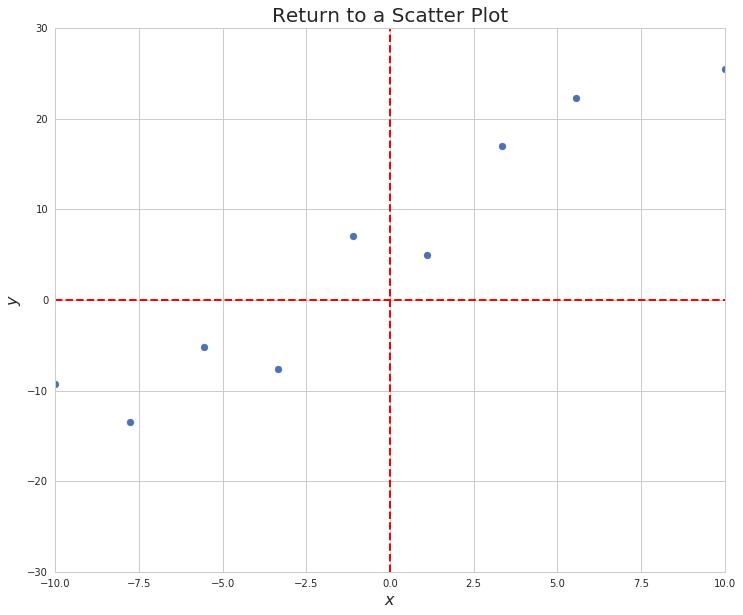

In [4]:
x = linspace(-10, 10, 10)
y = 1 + 2 * x + np.random.normal(0, 10, 10)

plt.figure(figsize = (12, 10))
plt.scatter(x = x, y = y)
plt.xlim(-10, 10)
plt.ylim(-30, 30)
plt.title(r'Return to a Scatter Plot', fontsize = 20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color = 'r', ls = '--', lw = 2.0)
plt.axhline(0, color = 'r', ls = '--', lw = 2.0)

Text(0.5,0,'$SSR(\\beta_0, \\beta_1)$')

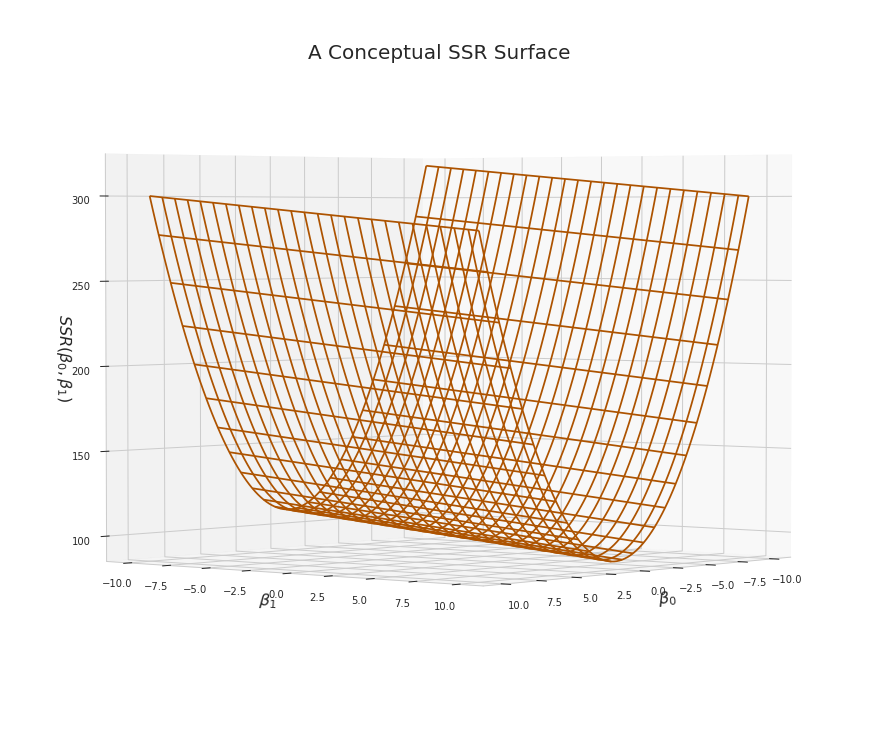

In [5]:
# A conceptual SSR surface. Increase the first argument in ax.view_init() to provide a different perspective.
b0 = linspace(-10, 10, 100)
b1 = linspace(-10, 10, 100)
b0, b1 = meshgrid(b0, b1)
rss = -1*(-2 * b0**2 + b0 + b1 - 100)

fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_wireframe(b0, b1, rss, rstride = 4, cstride = 4, color = '#AD5300')
ax.view_init(2, 40)
ax.set_title('A Conceptual SSR Surface', fontsize = 20)
ax.set_xlabel(r'$\beta_0$', fontsize = 16)
ax.set_ylabel(r'$\beta_1$', fontsize = 16)
ax.set_zlabel(r'$SSR(\beta_0, \beta_1)$', fontsize = 16)

In [6]:
# Least squares as a minimization problem.
import numpy as np
import statsmodels.api as sm
from scipy.optimize import minimize

In [7]:
# Generate some fake data.
# obs is number of observations. 
# params is the number of parameters to be estimated ignoring the constant.
# It is adjusted to include a constant using statsmodels "add_constants"
obs = 100
params = 1
params = params + 1
beta = np.random.randn(params, 1)
beta0 = np.zeros((params, 1))
X = np.random.randn(obs, params - 1)
X = sm.add_constant(X)
y = np.dot(X, beta) + np.random.randn(obs, 1)

In [8]:
def func(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    e = y - np.dot(X, bv)
    return np.array(np.sum(e**2))
def func_grad(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    foc = -np.sum(X * (y - np.dot(X, bv)), axis = 0)
    return np.array(foc)
res = minimize(func, beta0, args = (y, X, obs, params), method = 'BFGS', jac = func_grad, options = {'disp': True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 99.367090
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7


In [9]:
# Extract relevant results: betahat, covariance matrix, standard errors and t-statistics
betahat = res.x.reshape((params, 1))
e = y - np.dot(X, betahat)
s2 = np.dot(np.transpose(e), e)/(obs - params)
cov = s2*res.hess_inv
se, t = np.zeros((params, 1)), np.zeros((params, 1))
for i in range(0, params):
    se[i] = np.sqrt(cov[i, i])
    t[i] = res.x[i]/np.sqrt(cov[i, i])

In [10]:
#Display beta fromthe DGP, betahats, their standard errors, and their t-statistics.

print("The true value:", beta.T)
print("OLS estimates:", betahat.T)
print("OLS standard errors", se.T)
print("OLS t-values", t.T)

('The true value:', array([[1.25069949, 0.01220079]]))
('OLS estimates:', array([[ 1.11018572, -0.04123321]]))
('OLS standard errors', array([[0.10124749, 0.0996671 ]]))
('OLS t-values', array([[10.96506855, -0.41370937]]))
